In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

%matplotlib inline

## 数据预处理

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
print('共有{}条数据.'.format(len(df)))

共有891条数据.


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Pclass 代表社会经济状况，数字越小状况越好 1 = upper, 2 = mid, 3 = lower

In [5]:
df.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Sex male时为1， female时为0

In [6]:
df.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df.Sex.replace(['male', 'female'], [1, 0], inplace=True)

#### Age 有缺失值，简单用平均值填充

In [8]:
df.Age.isnull().sum()

177

In [9]:
df.Age.fillna(df.Age.mean(), inplace=True)

#### Sibsp	在船上的旁系亲属和配偶的数量

In [10]:
df.SibSp.isnull().sum()

0

#### Parch	在船上的父母子女的数量

In [11]:
df.Parch.isnull().sum()

0

#### Fare	船费

In [12]:
df.Fare.isnull().sum()

0

#### Embarked	登船港口 C = Cherbourg, Q = Queenstown, S = Southampton

In [13]:
df.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [14]:
df.Embarked.fillna('S', inplace=True)

In [15]:
df.Embarked.replace(['C','Q','S'], [0, 1, 2], inplace=True)

#### 最后的数据

In [16]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,0


## 划分训练集和验证集

In [17]:
total_X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
total_Y = df['Survived'].values

#### 随机化

In [18]:
random_indexes = np.random.permutation(len(total_X))

In [19]:
total_X = total_X[random_indexes]
total_Y = total_Y[random_indexes].reshape(-1, 1)

#### %70训练集, %30验证集

In [20]:
devide_num = int(len(total_X) * 0.3)
dev_X = total_X[:devide_num]
dev_Y = total_Y[:devide_num]
train_X = total_X[devide_num:]
train_Y = total_Y[devide_num:]

print('train_X shape:', train_X.shape)
print('dev_X shape:', dev_X.shape)

train_X shape: (624, 7)
dev_X shape: (267, 7)


## 构建神经网络

In [21]:
def net(lambd, layers_deep, layers_width):
    with tf.name_scope('placeholder'):
        input = tf.placeholder(dtype=tf.float32, shape=(None, train_X.shape[-1]), name='input')
        label = tf.placeholder(dtype=tf.int32, shape=(None, 1), name='label')
    
    layer_input = hidden_output = input
    
    with tf.name_scope('hidden_layers'):
        for layer_num in range(1, layers_deep):
            hidden_output = tf.layers.dense(layer_input,
                                           layers_width,
                                           activation=tf.nn.relu, 
                                           kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                           kernel_regularizer=tf.contrib.layers.l2_regularizer(tf.constant(lambd, dtype=tf.float32)), 
                                           name='layer_' + str(layer_num))
                
            layer_input = hidden_output
            
    with tf.name_scope('output'):
        logits = tf.layers.dense(hidden_output,
                                 1,
                                 activation=None, 
                                 kernel_initializer=tf.contrib.layers.xavier_initializer(),
                                 kernel_regularizer=tf.contrib.layers.l2_regularizer(tf.constant(lambd, dtype=tf.float32)), 
                                 name='output_layer')
        output = tf.nn.sigmoid(logits)
        
    return input, label, output, logits

In [22]:
def accuracy(output, labels, threshold=0.5):
    predicts = tf.cast(output >= threshold, tf.int32)
    is_rights = tf.equal(predicts, labels)
    accuracy = tf.reduce_mean(tf.cast(is_rights, tf.float32))
    
    return accuracy

In [23]:
def cost(logits, labels):
    labels = tf.cast(labels, tf.float32)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits))
    
    m = tf.cast(tf.shape(labels)[0], tf.float32)
    regular_cost = tf.losses.get_regularization_loss() / m
    
    return cost + regular_cost

In [69]:
def train_and_evaluate(train_X, train_Y, dev_X, dev_Y, lr, epochs, lambd, 
                       layers_deep, layers_width, accuracy_threshold=0.5, print_epochs=100):
    input_pl, label_pl, output_op, logits_op = net(lambd, layers_deep, layers_width)
    cost_op = cost(logits_op, label_pl)
    accuracy_op = accuracy(output_op, label_pl, accuracy_threshold)
    optimizer_op = tf.train.AdamOptimizer(lr).minimize(cost_op)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    train_accuracys = []
    dev_accuracys = []
    costs = []
    previous_cost = 1000000
    for epoch in range(1, epochs + 1):
        _, train_cost, train_accuracy = sess.run([optimizer_op, cost_op, accuracy_op], 
                                        feed_dict={input_pl: train_X, label_pl: train_Y})
        dev_cost, dev_accuracy = sess.run([cost_op, accuracy_op], 
                                 feed_dict={input_pl: dev_X, label_pl: dev_Y})
        
        if epoch % print_epochs == 0:
            print('epoch:', epoch)
            print('train_cost:{0:.4f}--dev_cost:{1:.4f}--train_accuracy:{2:.4f}--dev_accuracy:{3:.4f}'.format( 
              train_cost, dev_cost, train_accuracy, dev_accuracy))
            print('')
        
            costs.append(train_cost)
            train_accuracys.append(train_accuracy)
            dev_accuracys.append(dev_accuracy)
       
    plt.rc('figure', figsize=(14, 10))
    fig, axes = plt.subplots(2, 1)
    ax1 = axes[0]
    ax2 = axes[1]
    
    ax1.plot(costs, label='train_costs')
    ax1.set_xlabel('epochs/{}'.format(print_epochs))
    ax1.set_ylabel('cost')
    
    ax2.plot(train_accuracys, label='train_accuracy')
    ax2.plot(dev_accuracys, label='dev_accuracy')
    ax2.legend()
    ax2.set_xlabel('epochs/{}'.format(print_epochs))
    ax2.set_ylabel('accuracy')
    
    saver = tf.train.Saver()
    saver.save(sess, './model_save/model.ckpt')
    
    sess.close()

#### 超参数

In [88]:
lr = 0.002
epochs = 15000
labmd = 15
layers_deep = 7
layers_width = 21
threshold = 0.6
print_epochs = 1000

epoch: 1000
train_cost:0.5450--dev_cost:0.7232--train_accuracy:0.8253--dev_accuracy:0.8165

epoch: 2000
train_cost:0.5360--dev_cost:0.7084--train_accuracy:0.8285--dev_accuracy:0.8202

epoch: 3000
train_cost:0.5328--dev_cost:0.7090--train_accuracy:0.8301--dev_accuracy:0.8202

epoch: 4000
train_cost:0.5309--dev_cost:0.7097--train_accuracy:0.8333--dev_accuracy:0.8240

epoch: 5000
train_cost:0.5286--dev_cost:0.7147--train_accuracy:0.8317--dev_accuracy:0.8165

epoch: 6000
train_cost:0.5270--dev_cost:0.7156--train_accuracy:0.8173--dev_accuracy:0.8165

epoch: 7000
train_cost:0.5254--dev_cost:0.7175--train_accuracy:0.8253--dev_accuracy:0.8090

epoch: 8000
train_cost:0.5250--dev_cost:0.7175--train_accuracy:0.8189--dev_accuracy:0.8090

epoch: 9000
train_cost:0.5249--dev_cost:0.7183--train_accuracy:0.8317--dev_accuracy:0.8090

epoch: 10000
train_cost:0.5250--dev_cost:0.7182--train_accuracy:0.8173--dev_accuracy:0.8090

epoch: 11000
train_cost:0.5249--dev_cost:0.7201--train_accuracy:0.8381--dev_acc

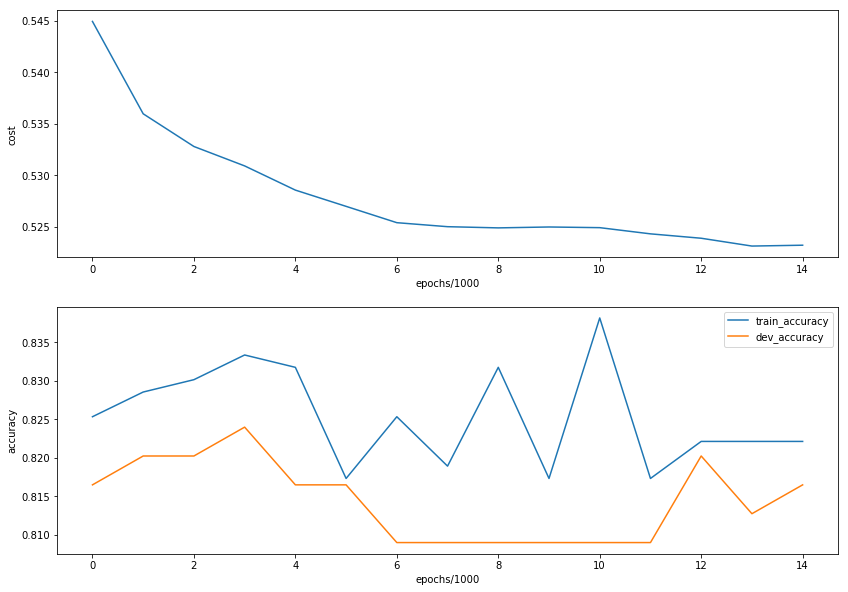

In [90]:
tf.reset_default_graph()
train_and_evaluate(train_X, train_Y, dev_X, dev_Y, lr, 
                   epochs, labmd, layers_deep, layers_width, threshold, print_epochs=print_epochs)

In [91]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
test_df.Sex.replace(['male', 'female'], [1, 0], inplace=True)
test_df.Age.fillna(df.Age.mean(), inplace=True)
test_df.Embarked.fillna('S', inplace=True)
test_df.Embarked.replace(['C','Q','S'], [0, 1, 2], inplace=True)

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [93]:
test_X = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
test_X.shape

(418, 7)

In [94]:
def predict(X, layers_deep, layers_width, threshold):
    input_pl, _, output_op, _ = net(0, layers_deep, layers_width)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    saver = tf.train.Saver()
    saver.restore(sess, './model_save/model.ckpt')
    
    output = sess.run(output_op, feed_dict={input_pl: X})
    
    predict = np.squeeze(output) >= threshold
    
    return predict.astype(np.int32)

In [95]:
tf.reset_default_graph()
predicts = predict(test_X, layers_deep, layers_width, threshold)

INFO:tensorflow:Restoring parameters from ./model_save/model.ckpt


/Users/zhangshulin_work/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater_equal
  if sys.path[0] == '':


In [96]:
ids = test_df['PassengerId'].values

In [97]:
result = pd.DataFrame({
    'PassengerId': ids,
    'Survived': predicts
})

In [98]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [100]:
result.to_csv('./zhangshulin_3.csv', index=False)